**Packages**

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from importlib.machinery import SourceFileLoader

tools = SourceFileLoader("tools", "../tools.py").load_module()

from tools import write_to_file

**The data set**

In [4]:
df = pd.read_csv('../data/prisoners_dilemma_meta_data_with_topics.csv', index_col=0)

In [5]:
len(df['unique_key'].unique())

2470

**Find the most representative document for each topic**

In [14]:
names = {0.0: 'A', 1.0: 'B', 2.0: "C", 3.0: "D", 4.0: 'E'}

In [18]:
documents_of_topic = pd.DataFrame()

documents_of_topic_grpd = df.groupby('Dominant_Topic')

for i, grp in documents_of_topic_grpd:
    documents_of_topic = pd.concat([documents_of_topic, 
                                    grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                    axis=0)
documents_of_topic.reset_index(drop=True, inplace=True)
documents_of_topic = documents_of_topic[['Dominant_Topic', 'Topic_Keywords', 'title']]

In [28]:
documents_of_topic

,Dominant_Topic,Topic_Keywords,Article Title
0,0.0,"social, behavior, human, study, experiment, co...",Facing Aggression: Cues Differ for Female vers...
1,1.0,"individual, group, good, show, high, increase,...",Genomic and Gene-Expression Comparisons among ...
2,2.0,"game, strategy, player, agent, dilemma, play, ...",Fingerprinting: Visualization and Automatic An...
3,3.0,"cooperation, network, population, evolutionary...",Influence of initial distributions on robust c...
4,4.0,"model, theory, base, system, problem, paper, p...",Gaming and price spikes in electric power mark...


In [29]:
references = ['\cite{Geniole2012}', '\cite{Sistrom2015}',
              '\cite{Sistrom2015}', '\cite{Chen2007}', '\cite{Guan2002}']

In [30]:
documents_of_topic['References'] = references

In [31]:
documents_of_topic = documents_of_topic.rename(columns={'title': 'Article Title'})

In [8]:
top = []
for i, grp in documents_of_topic_grpd:
     top.append(grp.sort_values(['Perc_Contribution'], ascending=[0]))

**Stats summary for each topic**

In [32]:
topic_counts = df[['Dominant_Topic', 'unique_key']].drop_duplicates()['Dominant_Topic'].value_counts()

topic_contribution = round(topic_counts / topic_counts.sum(), 4)

In [33]:
stats= pd.DataFrame([topic_counts.index,
                     topic_counts,
                     topic_contribution]).T
stats.columns = ['Dominant_Topic', 'Number of Documents', 'Percentage of Documents']

In [34]:
stats

,Dominant_Topic,Number of Documents,Percentage of Documents
0,2.0,561.0,0.2271
1,3.0,556.0,0.2251
2,4.0,548.0,0.2219
3,0.0,496.0,0.2008
4,1.0,309.0,0.1251


In [43]:
pd.set_option('max_colwidth', 800)
pd.set_option('display.expand_frame_repr', False)

In [44]:
documents_of_topic.merge(stats, on='Dominant_Topic').replace(names)

,Dominant_Topic,Topic_Keywords,Article Title,References,Number of Documents,Percentage of Documents
0,A,"social, behavior, human, study, experiment, cooperative, cooperation, suggest, find, behaviour",Facing Aggression: Cues Differ for Female versus Male Faces,\cite{Geniole2012},496.0,0.2008
1,B,"individual, group, good, show, high, increase, punishment, cost, result, benefit",Genomic and Gene-Expression Comparisons among Phage-Resistant Type-IV Pilus Mutants of <i>Pseudomonas syringae</i> pathovar <i>phaseolicola</i>,\cite{Sistrom2015},309.0,0.1251
2,C,"game, strategy, player, agent, dilemma, play, payoff, state, prisoner, equilibrium",Fingerprinting: Visualization and Automatic Analysis of Prisoner's Dilemma Strategies,\cite{Sistrom2015},561.0,0.2271
3,D,"cooperation, network, population, evolutionary, evolution, interaction, dynamic, structure, cooperator, study",Influence of initial distributions on robust cooperation in evolutionary\n Prisoner's Dilemma,\cite{Chen2007},556.0,0.2251
4,E,"model, theory, base, system, problem, paper, propose, information, provide, approach",Gaming and price spikes in electric power markets and possible remedies,\cite{Guan2002},548.0,0.2219


In [48]:
write_to_file(metric=documents_of_topic.merge(stats, on='Dominant_Topic').replace(names).to_latex(index=False)
              , filename="documents_of_topic.tex")

**Number of topics per year**

In [14]:
yearly = (
        df.groupby(["Dominant_Topic", "date"]).size().reset_index().groupby("date").size()
    )

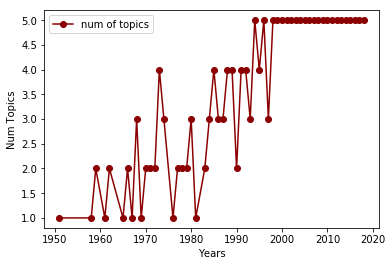

In [15]:
fig = plt.subplots()
plt.plot(yearly, '-o', color='darkred', label='num of topics');

plt.legend();
plt.ylabel("Num Topics")
plt.xlabel("Years");

**Number of articles per topic per year**

In [16]:
groups = ['A', 'B', 'C', 'D', 'E']

where (maybe):
   - A: social problems that are a pd
   - B: ipd with humans
   - C: ipd with computers
   - D: modelling situations as ipd
   - E: evolutionary dynamics

In [17]:
table = df.groupby(['date', 'Dominant_Topic']).size()

In [18]:
table

date    Dominant_Topic
1951.0  2.0                 1
1958.0  4.0                 1
1959.0  2.0                 1
        4.0                 1
1961.0  2.0                 1
                         ... 
2018.0  0.0               157
        1.0                69
        2.0               378
        3.0               279
        4.0               245
Length: 197, dtype: int64

In [19]:
years = sorted(df.date.unique())
selected_num_topics = 5

In [20]:
counts = []
for year in years:
    specific_year = df[df['date'] == year]
    count = []
    for topic in range(selected_num_topics):
        count.append(specific_year[specific_year["Dominant_Topic"] == topic].count().values[0])
    counts.append(count)

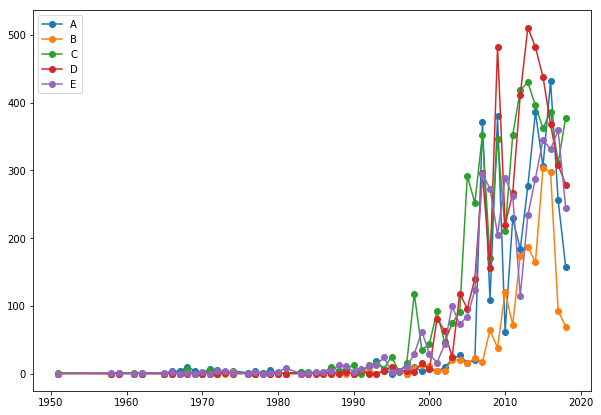

In [21]:
fig = plt.subplots(figsize=(10, 7))
for i in range(selected_num_topics):
    plt.plot(years, [c[i] for c in counts], '-o', label=f"{groups[i]}");
plt.legend();

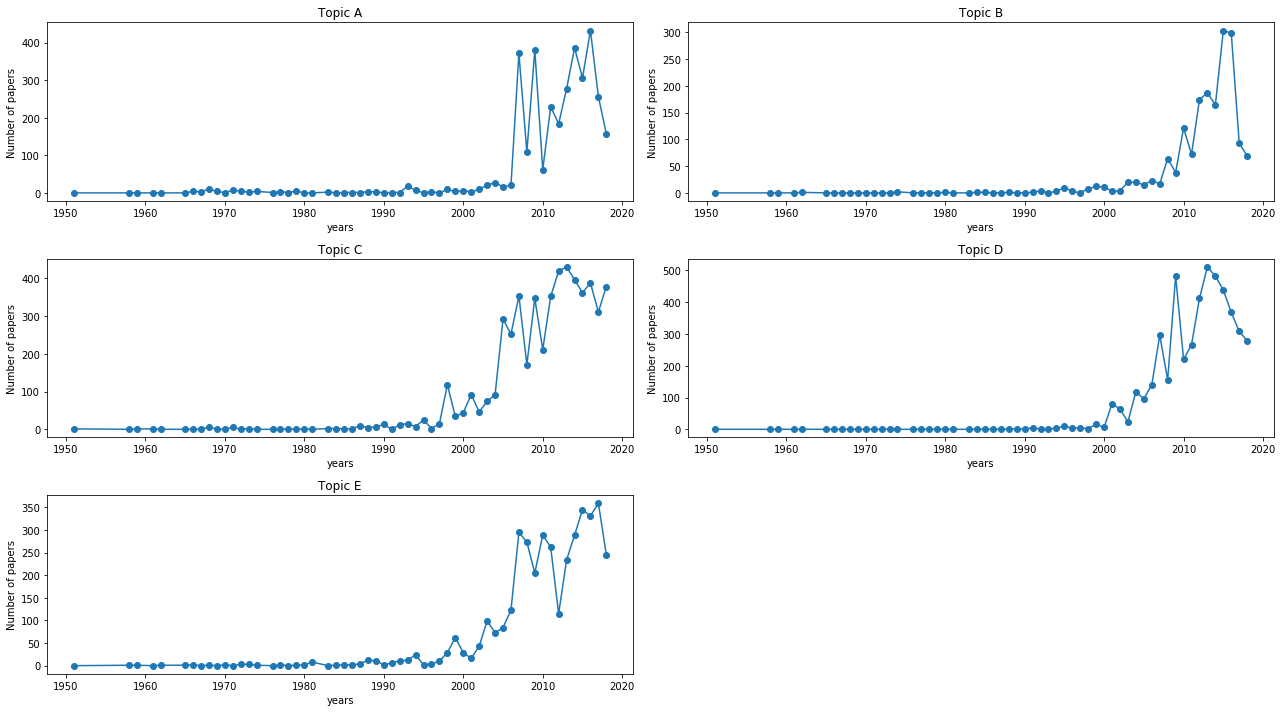

In [34]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 10))
for i in range(selected_num_topics):
    index = (int(i / 2), i % 2)
    axes[index].plot(years, [c[i] for c in counts], '-o',);
    axes[index].set_title(f"Topic {groups[i]}")
    axes[index].set_ylabel(f"Number of papers")
    axes[index].set_xlabel(f"years")     
fig.tight_layout()
fig.delaxes(axes[2,1])

plt.savefig("../../assets/images/papers_per_topic_over_time.pdf",
                bbox_inches="tight")

In [38]:
subset_of_years = years[45:]

In [39]:
counts = []
for year in subset_of_years:
    specific_year = df[df['date'] == year]
    count = []
    for topic in range(selected_num_topics):
        count.append(specific_year[specific_year["Dominant_Topic"] == topic].count().values[0])
    counts.append(count)

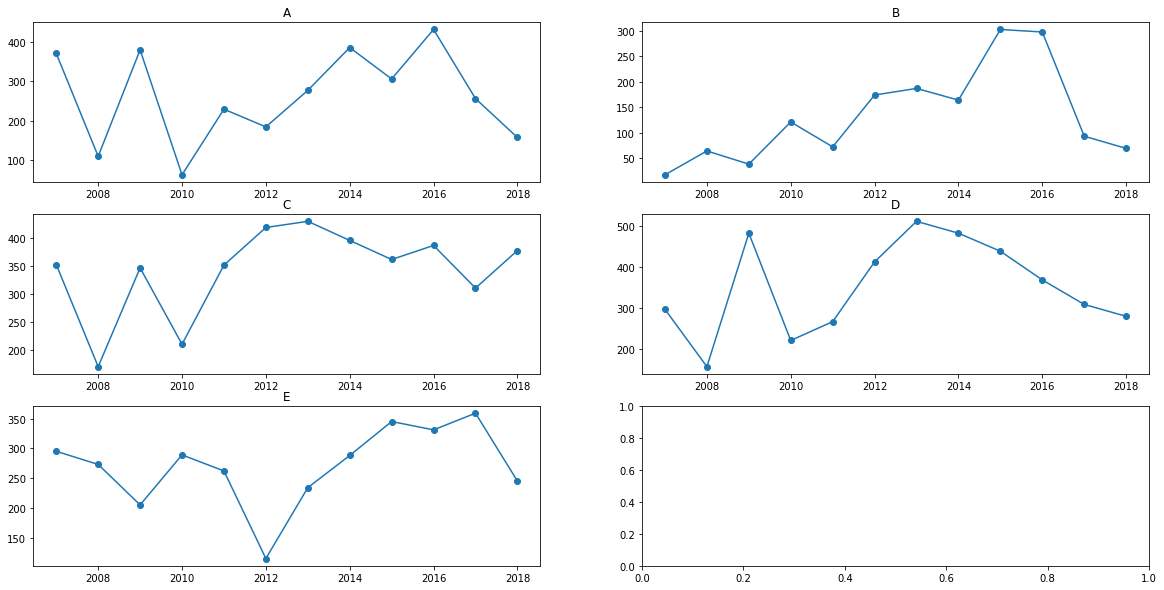

In [40]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 10))
for i in range(selected_num_topics):
    index = (int(i / 2), i % 2)
    axes[index].plot(subset_of_years, [c[i] for c in counts], '-o');
    axes[index].set_title(groups[i])

In [37]:
df = pd.read_csv('../data/prisoners_dilemma_articles_meta_data_clean.csv')

In [38]:
years = sorted(df.date.unique())